# Calculating derivatives

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
from derivatives import derivative_ridders, derivative_fivepoint

In [18]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

## First investigate the Tableau from Ridders' method

In [20]:
f = math.exp
h = 0.01
x = 1.5
der, error = derivative_ridders(f,x,h,n=5,verbose=True)
print(f"Derivative = {der} +/- {error}")

------------ i =  0
[[4.48176377 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
------------ i =  1
[[4.48172718 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
------------ i =  2
[[4.48172718 4.48170851 0.         0.         0.        ]
 [0.         4.48168907 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
------------ i =  3
[[4.48172718 4.48170851 4.48169899 0.         0

## Now check the accuracy of the methods for a few functions

Including the crazy $\sin(1/x)$. 

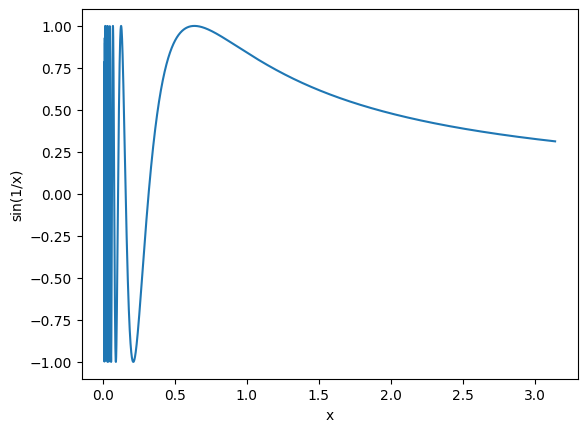

In [21]:
a = 0.01
b = np.pi
xvals = np.linspace(a,b,10000)
yvals = np.sin(1./xvals)
plt.xlabel("x")
plt.ylabel("sin(1/x)")
plt.plot(xvals,yvals)
plt.show()

In [25]:
print ("Testing algorithms for computing numeric derivatives")

error = 0.0
h = 0.01

der_funcs = [
    [np.exp, np.exp, "exp"],
    [np.sin, np.cos, "sin"],
    [lambda x : x**2, lambda x : 2*x, "x^2"],
    [lambda x : np.sin(1/x), lambda x : np.cos(1/x)/x**2, "sin(1/x)" ]
]

x = 0.001
print("------ x = %1.0f,  expected error = h^4 = %5.2e" %(x, h**4))    
for dfunc, tfunc, name in der_funcs:
    # dfunc = python function f(x)
    # tfunc = analytical (true) derivative of f(x)
    der_ridders, error_ridders =  derivative_ridders(dfunc, x, h)
    der_5p = derivative_fivepoint(dfunc,x,h)
    print(f"d({name:8s}(x))/dx = {tfunc(x):+16.12e}, Ridders = {der_ridders:+16.12e} +/- {error_ridders:+3.1e}, 5pt = {der_5p:+16.12e}")
    #print ('D {0:8s} = {1:+16.12e}, ridders = {2:+16.12e}, 5pt = {3:+16.12e} obs error = {4:+3.1e}'.format( name, tfunc(x), xprime, xprime2, error))


Testing algorithms for computing numeric derivatives
------ x = 0,  expected error = h^4 = 1.00e-08
d(exp     (x))/dx = +1.001000500167e+00, Ridders = +1.001000500167e+00 +/- +4.7e-14, 5pt = +1.001000499833e+00
d(sin     (x))/dx = +9.999995000000e-01, Ridders = +9.999995000000e-01 +/- +0.0e+00, 5pt = +9.999994996667e-01
d(x^2     (x))/dx = +2.000000000000e-03, Ridders = +2.000000000000e-03 +/- +4.3e-19, 5pt = +2.000000000000e-03
d(sin(1/x)(x))/dx = +5.623790762907e+05, Ridders = -3.185762167692e+01 +/- +2.6e+01, 5pt = -4.981557995303e+01
